Build a model that can be used to predict stroke.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df=df.drop(columns='id')

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df = df.dropna() #drop null values

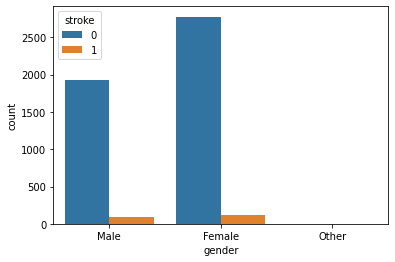

In [12]:
sns.countplot(x = "gender",hue = "stroke",data = df)

In [ ]:
df = pd.get_dummies(df, drop_first=True) #to change yes/no rural/urban to 0/1

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

In [ ]:
df['age'] = scalar_.fit_transform(df[['age']])    

In [ ]:
df['avg_glucose_level'] = scalar_.fit_transform(df[['avg_glucose_level']])

In [ ]:
df['bmi'] = scalar_.fit_transform(df[['bmi']])

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,avg_gloucose_level
0,1.070138,0,1,2.777698,0.981345,1,1,0,1,0,1,0,0,1,1,0,0,2.777698
2,1.646563,0,1,0.013842,0.459269,1,1,0,1,0,1,0,0,0,0,1,0,0.013842
3,0.272012,0,0,1.484132,0.701207,1,0,0,1,0,1,0,0,1,0,0,1,1.484132
4,1.602222,1,0,1.549193,-0.623083,1,0,0,1,0,0,1,0,0,0,1,0,1.549193
5,1.690903,0,0,1.821368,0.013595,1,1,0,1,0,1,0,0,1,1,0,0,1.821368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324241,0,0,-0.050094,-1.310695,0,0,0,0,0,0,0,1,0,0,0,0,-0.050094
5106,1.690903,0,0,0.447882,1.414286,0,0,0,1,0,0,1,0,1,0,1,0,0.447882
5107,-0.348753,0,0,-0.502369,0.217332,0,0,0,1,0,0,1,0,0,0,1,0,-0.502369
5108,0.360692,0,0,1.372920,-0.419346,0,1,0,1,0,1,0,0,0,1,0,0,1.372920


In [ ]:
y = df['stroke'].values

In [ ]:
x = df.drop(columns='stroke').values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0, stratify = y)

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1999, metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1999, p=2,
                     weights='uniform')

In [ ]:
pred_y=classifier.predict(x_test)

In [ ]:
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
score=classifier.score(x_test,y_test)

In [ ]:
score

0.9572301425661914